# 泰坦尼克号数据分析
**数据来源：** Udacity 提供

**数组字段说明：**

PassengerId乘客编号，

Survived：乘客是否存活，

Pclass：乘客所在的船舱等级，

Name：乘客姓名，

Sex：乘客性别，

Age：乘客年龄，

SibSp：乘客的兄弟姐妹和配偶数量，

Parch：乘客的父母与子女数量，

Ticket：票的编号，

Fare：票价，

Cabin：座位号，

Embarked：乘客登船码头。 



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取泰坦尼克数据
passengers = pd.read_csv("titanic-data.csv")
print passengers.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
# 生存与死亡的人数
passengers["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# 不同性别的人数
passengers["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x116cd3310>], dtype=object)

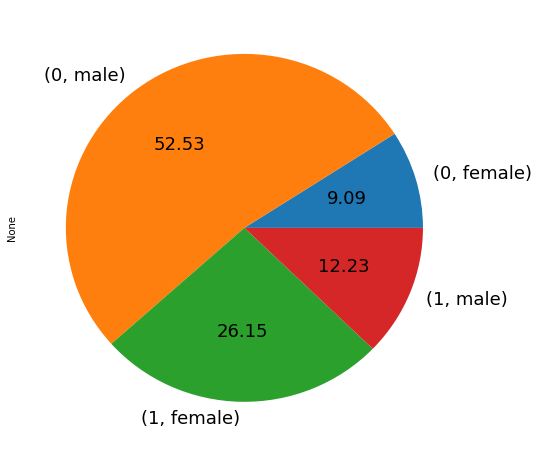

In [51]:
# 生存与死亡人中男女人数
survived_sex = passengers.groupby(["Survived", "Sex"]).size()
print survived_sex
survived_sex.plot(kind="pie", subplots=True, autopct='%.2f',figsize=(8,8), fontsize=18)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64
Embarked  Survived  Sex   
C         0         female      9
                    male       66
          1         female     64
                    male       29
Q         0         female      9
                    male       38
          1         female     27
                    male        3
S         0         female     63
                    male      364
          1         female    140
                    male       77
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b3bf750>], dtype=object)

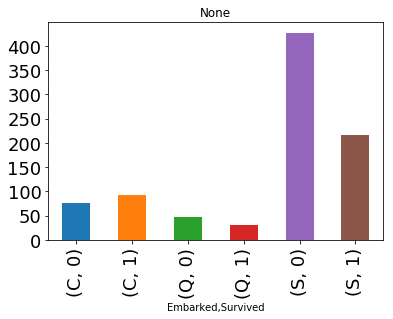

In [56]:
embarked_survived = passengers.groupby(["Embarked", "Survived"]).size()
print embarked_survived
embarked_survived_sex = passengers.groupby(["Embarked", "Survived", "Sex"]).size()
print embarked_survived_sex
embarked_survived.plot(kind="bar", subplots=True, fontsize=18)

【参考】
1、[]